In [60]:
from utils.putils import reader
import plotly.express as px

# from mbmutils import mu
# import pandas as pd

CAR_COLOR = "#b8422a"
GUN_COLOR   = "#555f73"
COLOR_MAP_TYPE = {"car_deaths": CAR_COLOR ,
                  "car_death_rate": CAR_COLOR ,
                  "car_death_rate_neg": CAR_COLOR ,
                  "gun_deaths": GUN_COLOR,
                  "gun_death_rate": GUN_COLOR,
                  "gun_death_rate_neg": GUN_COLOR, }

In [65]:
gun_v_car_df = reader.read_gun_vs_car()
gun_v_car_df["rate_diff"] = gun_v_car_df["gun_death_rate"] - gun_v_car_df["car_death_rate"]
gun_v_car_df["rate_combined"] = gun_v_car_df["gun_death_rate"] + gun_v_car_df["car_death_rate"]

In [54]:
px.bar(gun_v_car_df.query("y == 2010").sort_values("gun_deaths", ascending=False).head(10),
       x="state", y=["gun_deaths", "car_deaths"],
       color_discrete_map=COLOR_MAP_TYPE,
       title="2010: Car vs. Gun Deaths")

In [55]:
px.bar(gun_v_car_df.query("y == 2020").sort_values("gun_deaths", ascending=False).head(10),
       x="state", y=["gun_deaths", "car_deaths"],
       color_discrete_map=COLOR_MAP_TYPE,
       title="2020: Car vs. Gun Deaths")

In [56]:
px.bar(gun_v_car_df.query("y == 2020").sort_values("gun_death_rate", ascending=False).head(20),
       x="state", y=["gun_death_rate", "car_death_rate"],
       color_discrete_map=COLOR_MAP_TYPE,
       title="2020: Car vs. Gun Death Rates")

In [66]:
_data = gun_v_car_df.query("y == 2020").copy()
_data["gun_death_rate_neg"] = _data["gun_death_rate"] * -1

_data = _data.sort_values("rate_combined", ascending=False)

px.bar(_data,
       x="state", y=["gun_death_rate_neg", "car_death_rate"],
       title="2020: Car vs. Gun Death Rates (per 100k)",
       opacity=0.7,
       color_discrete_map=COLOR_MAP_TYPE,
       height=800)

In [62]:
_data = gun_v_car_df.query("y == 2020").query("state == 'California'").sort_values("gun_death_rate", ascending=False)
px.pie(values=[_data["gun_death_rate"].values[0], _data["car_death_rate"].values[0]],
       names=["gun_death_rate", "car_death_rate"],
       height=600,
       color_discrete_sequence=[CAR_COLOR, GUN_COLOR],
       title="2020: California Car vs. Gun Death Rates (ratio)",)

In [67]:
import numpy as np

_data = gun_v_car_df.query("y == 2020").copy()
_data["rate_diff"] = gun_v_car_df["gun_death_rate"] - gun_v_car_df["car_death_rate"]
_data["_bar_color"] = np.where(_data["rate_diff"]<0, CAR_COLOR, GUN_COLOR)

_data = _data.sort_values("rate_diff", ascending=False)

fig = px.bar(_data,
             x="state", y="rate_diff",
             title="2020: Car vs. Gun Death Rates Difference (per 100k)",
             opacity=0.7,
             labels={ "rate_diff" : "Rate Difference (gun above)", },
             height=600)

fig.update_traces(marker_color=_data["_bar_color"])

In [104]:
def plot_differences(df, states=None, display_type=None):
    _data1 = df.query("y == 2020").copy()
    if states != None:
        _data1 = _data1.query

    _data1["gun_death_rate_neg"] = _data1["gun_death_rate"] * -1
    _data1["_bar_color"] = np.where(_data1["gun_death_rate"] < _data1["car_death_rate"], CAR_COLOR, GUN_COLOR)

    _data1 = _data1.sort_values("rate_diff", ascending=False)

    fig1 = px.bar(_data1,
                  x="state", y=["gun_death_rate_neg", "car_death_rate"],
                  title="2020: Car vs. Gun Death Rates (per 100k)",
                  opacity=1.0,
                  barmode="overlay",
                  color_discrete_map=COLOR_MAP_TYPE,
                  height=800)
    # fig1.update_traces(marker_color=_data1["_bar_color"])

    _data2 = df.query("y == 2020").copy()
    _data2["_bar_color"] = np.where(_data2["rate_diff"]<0, CAR_COLOR, GUN_COLOR)
    _data2["rate_diff_opp"] = _data2["rate_diff"] * -1
    _data2 = _data2.sort_values("rate_diff", ascending=False)

    fig2 = px.bar(_data2,
                  x="state", y="rate_diff_opp",
                  title="2020: Car vs. Gun Death Rates Difference (per 100k)",
                  opacity=0.5,
                  barmode="overlay",
                  labels={ "rate_diff" : "Rate Difference (car above)",  "rate_diff_opp" : "Rate Difference (car above)", },
                  height=800)

    # fig2.update_traces(marker_color=_data2["_bar_color"])
    fig2.update_traces(marker_color="white")


    fig1.add_trace(fig2.data[0])
    # fig2.add_trace(fig1.data[0])
    if display_type:
        fig1.show(display_type)
    else:
        fig1.show()


In [106]:
plot_differences(gun_v_car_df)


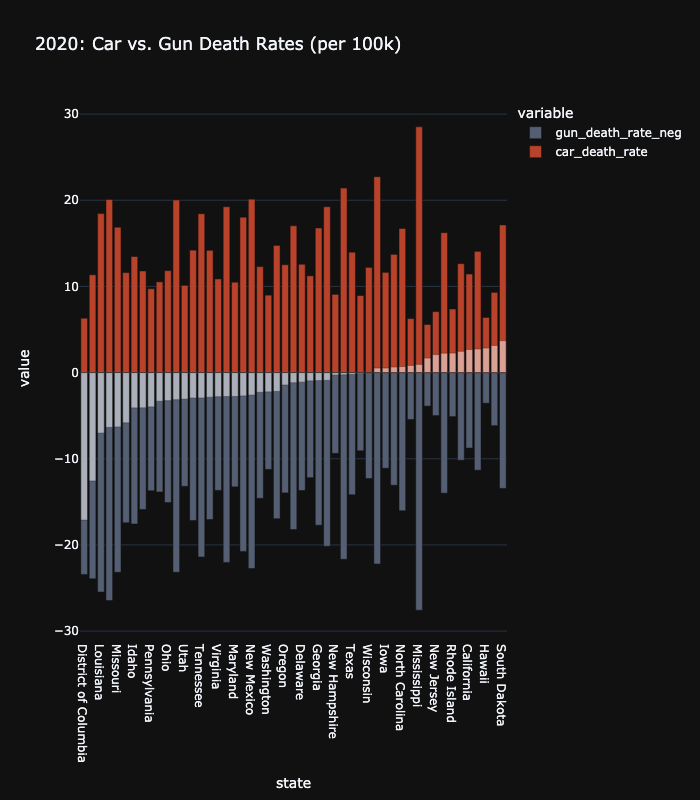

In [105]:
plot_differences(gun_v_car_df, display_type="png")